In [1]:

import sys
sys.path.append('/Users/charleshiggins/Personal/CharlesPhD/CodeRepo/xai_intervention/RL-LRP/')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from contextlib import contextmanager
from experiments import reverse_layer, diff_softmax

/Users/charleshiggins/miniconda3/envs/minatar/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/charleshiggins/miniconda3/envs/minatar/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/charleshiggins/miniconda3/envs/minatar/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/charleshiggins/miniconda3/envs/minatar/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [13]:
def run_test_on_inner_net(inner_model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inner_model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        data, target = next(iter(test_loader))
        data, target = data.to(device), target.to(device)
        output = inner_model(data)
        print(output.shape, target.shape)
        test_loss = nn.functional.cross_entropy(output, target).item()
        pred = output.argmax(dim=1, keepdim=False)
        print(pred.shape, target.shape)
        print(pred, target)
        correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(target)} ({100. * correct / len(target):.0f}%)\n')
    return

Train Epoch: [0/60000 (0%)]	Loss: 1.023946


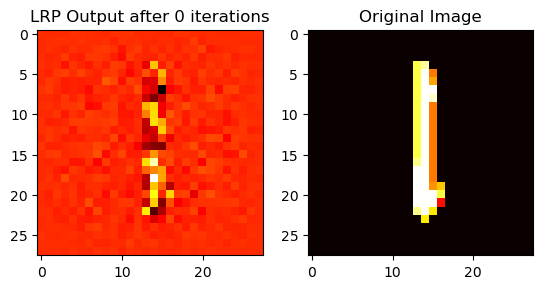

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6]) tensor([2, 2, 1, 5, 9, 1, 6, 8, 7, 1, 8, 0, 1, 9, 4, 1, 3, 1, 0, 7, 6, 7, 6, 3,
        3, 9, 9, 7, 0, 2, 8, 8, 6, 1, 4, 3, 1, 7, 5, 3, 0, 0, 4, 9, 7, 1, 4, 3,
        4, 7, 5, 8, 5, 4, 1, 2, 9, 0, 7, 2, 4, 8, 5, 3])

Test set: Average loss: 0.0002, Accuracy: 6/64 (9%)

Train Epoch: [640/60000 (1%)]	Loss: 0.928720
Train Epoch: [1280/60000 (2%)]	Loss: 0.805835
Train Epoch: [1920/60000 (3%)]	Loss: 0.834163
Train Epoch: [2560/60000 (4%)]	Loss: 0.756974
Train Epoch: [3200/60000 (5%)]	Loss: 0.676866


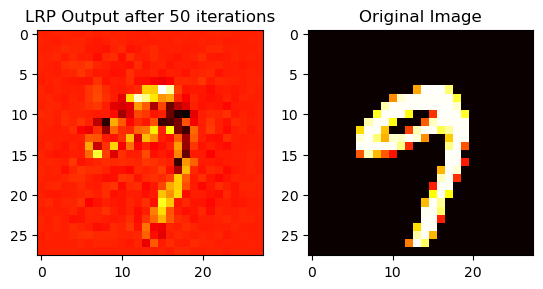

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 8, 8, 8, 8, 8, 9, 9, 8, 0, 9, 6, 6, 8, 8, 8, 8, 9, 6, 6, 6, 8, 8, 8,
        9, 6, 9, 8, 8, 8, 6, 8, 9, 8, 9, 6, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,
        6, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 9, 8, 0, 8]) tensor([7, 6, 2, 5, 8, 6, 7, 9, 3, 4, 9, 6, 6, 2, 0, 5, 2, 1, 4, 6, 4, 2, 1, 5,
        9, 9, 1, 6, 5, 3, 9, 2, 7, 9, 1, 9, 3, 2, 8, 5, 8, 3, 9, 8, 1, 5, 3, 1,
        5, 6, 4, 5, 8, 4, 1, 8, 0, 3, 2, 6, 1, 1, 7, 8])

Test set: Average loss: 0.0002, Accuracy: 14/64 (22%)

Train Epoch: [3840/60000 (6%)]	Loss: 0.684885
Train Epoch: [4480/60000 (7%)]	Loss: 0.731124
Train Epoch: [5120/60000 (9%)]	Loss: 0.811695
Train Epoch: [5760/60000 (10%)]	Loss: 0.603546
Train Epoch: [6400/60000 (11%)]	Loss: 0.847153


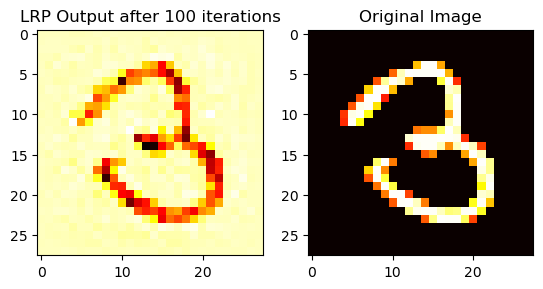

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 8, 6, 8, 6, 8, 8, 8, 8, 9, 0, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 0, 8,
        8, 8, 8, 0, 8, 8, 6, 8, 0, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8, 9]) tensor([6, 4, 4, 4, 7, 0, 2, 0, 3, 9, 4, 3, 5, 2, 1, 7, 0, 7, 9, 7, 8, 2, 4, 2,
        1, 3, 0, 4, 0, 5, 9, 9, 4, 2, 8, 8, 0, 7, 2, 0, 2, 8, 3, 7, 5, 4, 4, 7,
        5, 8, 0, 8, 8, 3, 4, 3, 1, 4, 4, 3, 0, 3, 4, 9])

Test set: Average loss: 0.0003, Accuracy: 10/64 (16%)

Train Epoch: [7040/60000 (12%)]	Loss: 0.565488
Train Epoch: [7680/60000 (13%)]	Loss: 0.549527
Train Epoch: [8320/60000 (14%)]	Loss: 0.632094
Train Epoch: [8960/60000 (15%)]	Loss: 0.629702
Train Epoch: [9600/60000 (16%)]	Loss: 0.475908


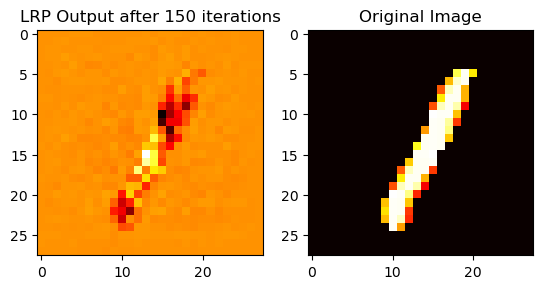

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 6, 6, 8, 9, 8, 8, 9, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 9, 8, 9, 8, 6, 8, 8, 6, 8, 8, 8, 8, 8, 8, 9, 6, 8, 8,
        8, 8, 8, 8, 9, 8, 9, 8, 8, 8, 8, 8, 8, 8, 9, 9]) tensor([5, 0, 5, 7, 3, 2, 3, 8, 2, 9, 0, 6, 9, 1, 4, 7, 7, 4, 7, 0, 1, 1, 8, 9,
        9, 6, 2, 7, 1, 3, 3, 1, 4, 0, 9, 7, 1, 4, 2, 3, 8, 3, 9, 0, 1, 9, 7, 9,
        8, 2, 8, 7, 9, 1, 1, 1, 2, 5, 5, 2, 1, 6, 9, 9])

Test set: Average loss: 0.0002, Accuracy: 8/64 (12%)

Train Epoch: [10240/60000 (17%)]	Loss: 0.533114
Train Epoch: [10880/60000 (18%)]	Loss: 0.678088
Train Epoch: [11520/60000 (19%)]	Loss: 0.644312
Train Epoch: [12160/60000 (20%)]	Loss: 0.437305
Train Epoch: [12800/60000 (21%)]	Loss: 0.560809


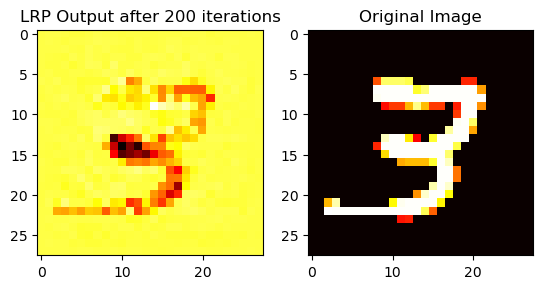

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 8, 8, 8, 8, 9, 9, 8, 9, 9, 8, 9, 8,
        9, 8, 8, 8, 8, 8, 8, 0, 8, 9, 9, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 9, 9, 8,
        9, 8, 8, 9, 8, 8, 9, 8, 9, 8, 9, 8, 8, 8, 6, 8]) tensor([2, 6, 8, 1, 3, 8, 1, 8, 0, 1, 1, 6, 7, 6, 0, 0, 8, 1, 6, 9, 1, 8, 4, 1,
        7, 2, 3, 8, 3, 6, 8, 4, 8, 6, 1, 5, 0, 0, 5, 1, 0, 6, 1, 6, 6, 6, 1, 8,
        5, 0, 3, 1, 5, 8, 7, 3, 4, 5, 4, 5, 2, 7, 9, 5])

Test set: Average loss: 0.0002, Accuracy: 10/64 (16%)

Train Epoch: [13440/60000 (22%)]	Loss: 0.429815
Train Epoch: [14080/60000 (23%)]	Loss: 0.499022
Train Epoch: [14720/60000 (25%)]	Loss: 0.559632
Train Epoch: [15360/60000 (26%)]	Loss: 0.488935
Train Epoch: [16000/60000 (27%)]	Loss: 0.512405


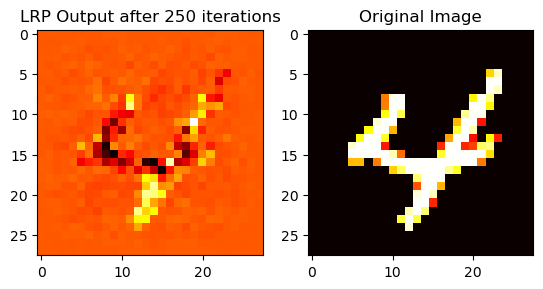

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 8, 8, 8, 9, 8, 9, 9, 8, 8, 9, 8, 9, 8, 8, 9, 9, 6, 9, 9, 8, 8, 8, 9,
        9, 8, 8, 9, 9, 8, 9, 8, 9, 9, 9, 9, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8, 8, 9,
        8, 8, 8, 8, 8, 8, 9, 6, 8, 8, 8, 8, 8, 8, 9, 6]) tensor([1, 5, 7, 0, 1, 3, 7, 9, 8, 0, 6, 0, 5, 0, 0, 4, 1, 4, 9, 5, 2, 6, 1, 1,
        5, 3, 5, 9, 0, 5, 9, 6, 7, 6, 6, 7, 3, 1, 0, 8, 1, 8, 2, 3, 6, 1, 8, 1,
        8, 6, 8, 8, 0, 2, 8, 6, 6, 5, 8, 6, 0, 8, 5, 4])

Test set: Average loss: 0.0002, Accuracy: 14/64 (22%)

Train Epoch: [16640/60000 (28%)]	Loss: 0.545421
Train Epoch: [17280/60000 (29%)]	Loss: 0.637453
Train Epoch: [17920/60000 (30%)]	Loss: 0.652480
Train Epoch: [18560/60000 (31%)]	Loss: 0.520867
Train Epoch: [19200/60000 (32%)]	Loss: 0.440142


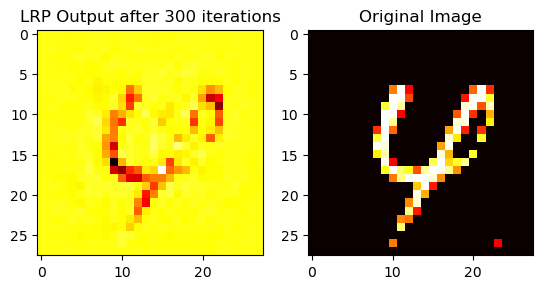

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 9, 8, 9, 9, 0, 9, 9, 9, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 9, 8, 9,
        9, 9, 9, 9, 8, 8, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 8, 8, 9, 9, 9, 9,
        9, 8, 8, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 8, 8, 9]) tensor([3, 7, 7, 3, 5, 4, 4, 9, 2, 4, 0, 2, 5, 1, 7, 1, 2, 9, 6, 9, 0, 0, 0, 7,
        7, 4, 1, 1, 8, 6, 3, 4, 8, 0, 2, 8, 8, 7, 7, 2, 2, 5, 1, 8, 5, 2, 5, 6,
        9, 2, 3, 1, 6, 8, 4, 4, 6, 8, 4, 9, 2, 0, 6, 6])

Test set: Average loss: 0.0002, Accuracy: 8/64 (12%)

Train Epoch: [19840/60000 (33%)]	Loss: 0.698348
Train Epoch: [20480/60000 (34%)]	Loss: 0.548228
Train Epoch: [21120/60000 (35%)]	Loss: 0.539936
Train Epoch: [21760/60000 (36%)]	Loss: 0.500220
Train Epoch: [22400/60000 (37%)]	Loss: 0.547121


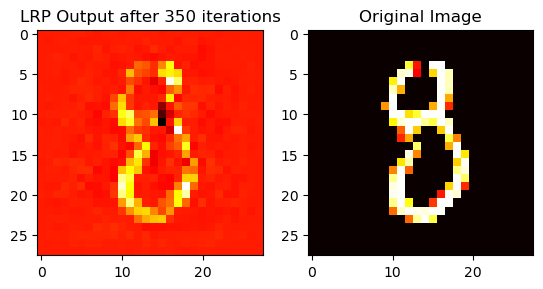

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9,
        9, 6, 8, 9, 9, 9, 9, 8, 9, 9, 8, 9, 8, 9, 9, 8]) tensor([8, 5, 7, 6, 4, 1, 3, 9, 9, 1, 6, 8, 9, 7, 3, 2, 8, 6, 6, 7, 7, 4, 9, 0,
        6, 6, 1, 2, 1, 1, 9, 1, 9, 6, 1, 9, 0, 9, 9, 4, 6, 0, 9, 5, 5, 9, 7, 5,
        7, 4, 0, 1, 6, 7, 0, 3, 2, 3, 1, 5, 2, 9, 5, 3])

Test set: Average loss: 0.0002, Accuracy: 14/64 (22%)

Train Epoch: [23040/60000 (38%)]	Loss: 0.665700
Train Epoch: [23680/60000 (39%)]	Loss: 0.622380
Train Epoch: [24320/60000 (41%)]	Loss: 0.714230
Train Epoch: [24960/60000 (42%)]	Loss: 0.545390
Train Epoch: [25600/60000 (43%)]	Loss: 0.501533


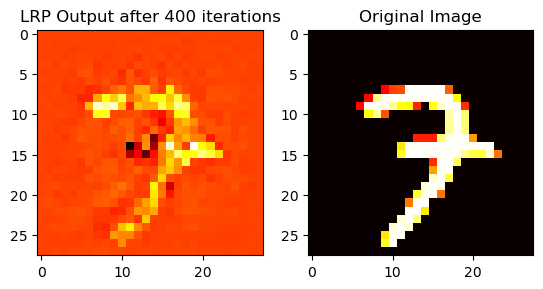

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 9, 9, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9,
        9, 9, 8, 9, 9, 8, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8,
        9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9]) tensor([0, 2, 7, 6, 5, 1, 5, 4, 6, 5, 2, 4, 4, 5, 6, 7, 8, 5, 3, 0, 4, 3, 8, 9,
        8, 2, 3, 2, 6, 6, 5, 9, 3, 1, 5, 8, 2, 2, 2, 3, 8, 2, 2, 5, 9, 7, 0, 3,
        0, 1, 1, 9, 2, 4, 0, 2, 4, 6, 8, 0, 1, 3, 2, 9])

Test set: Average loss: 0.0002, Accuracy: 5/64 (8%)

Train Epoch: [26240/60000 (44%)]	Loss: 0.406097
Train Epoch: [26880/60000 (45%)]	Loss: 0.506204
Train Epoch: [27520/60000 (46%)]	Loss: 0.444824
Train Epoch: [28160/60000 (47%)]	Loss: 0.421069
Train Epoch: [28800/60000 (48%)]	Loss: 0.535905


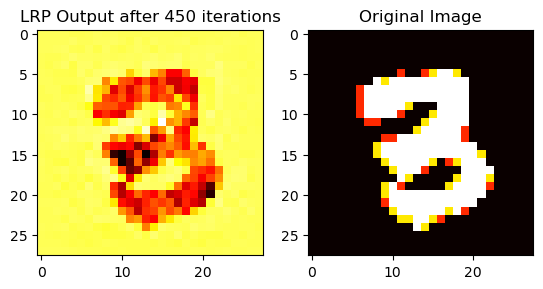

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 9, 9, 6, 8, 9, 9, 8, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 8, 9, 9, 0, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 8, 9, 9, 9,
        9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 8, 0, 9, 9]) tensor([3, 8, 2, 4, 7, 9, 1, 3, 4, 5, 2, 4, 4, 2, 1, 3, 2, 7, 0, 3, 7, 9, 2, 7,
        7, 3, 5, 6, 5, 4, 1, 7, 6, 2, 6, 7, 8, 3, 3, 8, 2, 9, 9, 3, 3, 7, 8, 4,
        9, 6, 1, 8, 3, 3, 1, 1, 9, 8, 9, 9, 3, 4, 7, 6])

Test set: Average loss: 0.0003, Accuracy: 8/64 (12%)

Train Epoch: [29440/60000 (49%)]	Loss: 0.483395
Train Epoch: [30080/60000 (50%)]	Loss: 0.486711
Train Epoch: [30720/60000 (51%)]	Loss: 0.590370
Train Epoch: [31360/60000 (52%)]	Loss: 0.454157
Train Epoch: [32000/60000 (53%)]	Loss: 0.512260


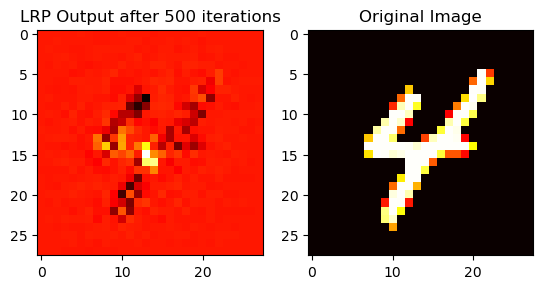

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8, 9, 9, 9, 8, 9, 8,
        8, 9, 9, 6, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([7, 1, 6, 7, 0, 1, 5, 5, 1, 5, 4, 4, 1, 0, 2, 3, 6, 9, 4, 6, 9, 2, 0, 2,
        7, 7, 6, 4, 6, 6, 0, 3, 3, 8, 2, 8, 3, 3, 0, 4, 4, 7, 5, 9, 5, 0, 4, 2,
        7, 0, 4, 4, 3, 5, 2, 6, 7, 5, 7, 4, 6, 8, 7, 2])

Test set: Average loss: 0.0003, Accuracy: 3/64 (5%)

Train Epoch: [32640/60000 (54%)]	Loss: 0.603506
Train Epoch: [33280/60000 (55%)]	Loss: 0.543194
Train Epoch: [33920/60000 (57%)]	Loss: 0.468700
Train Epoch: [34560/60000 (58%)]	Loss: 0.549084
Train Epoch: [35200/60000 (59%)]	Loss: 0.459234


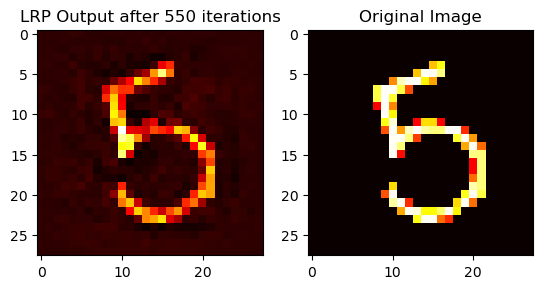

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9,
        9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9,
        9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 8]) tensor([8, 3, 8, 2, 0, 5, 8, 3, 4, 4, 8, 6, 2, 0, 6, 1, 3, 6, 2, 7, 7, 5, 8, 7,
        4, 9, 2, 3, 6, 8, 3, 7, 0, 6, 2, 2, 6, 2, 3, 1, 9, 9, 8, 3, 3, 2, 1, 0,
        8, 0, 8, 6, 4, 8, 6, 3, 3, 5, 5, 2, 8, 0, 8, 6])

Test set: Average loss: 0.0002, Accuracy: 3/64 (5%)

Train Epoch: [35840/60000 (60%)]	Loss: 0.544000
Train Epoch: [36480/60000 (61%)]	Loss: 0.542142
Train Epoch: [37120/60000 (62%)]	Loss: 0.527383
Train Epoch: [37760/60000 (63%)]	Loss: 0.481189
Train Epoch: [38400/60000 (64%)]	Loss: 0.646245


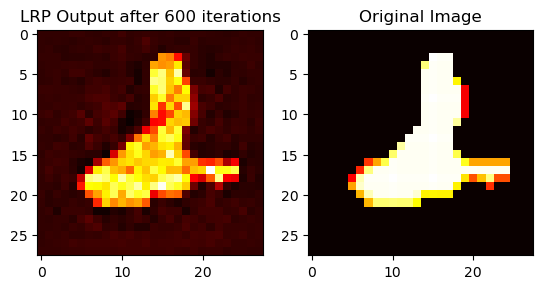

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 8, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 8, 9, 8, 9, 9, 9, 9, 8,
        9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9]) tensor([1, 2, 5, 1, 4, 3, 2, 8, 0, 3, 1, 8, 3, 1, 7, 5, 4, 3, 8, 2, 9, 5, 7, 7,
        1, 4, 3, 6, 6, 0, 3, 9, 1, 2, 9, 3, 4, 7, 1, 0, 5, 9, 3, 8, 1, 9, 0, 7,
        8, 0, 1, 6, 2, 0, 5, 4, 9, 6, 0, 4, 6, 4, 2, 1])

Test set: Average loss: 0.0003, Accuracy: 6/64 (9%)

Train Epoch: [39040/60000 (65%)]	Loss: 0.504820
Train Epoch: [39680/60000 (66%)]	Loss: 0.567267
Train Epoch: [40320/60000 (67%)]	Loss: 0.520734
Train Epoch: [40960/60000 (68%)]	Loss: 0.436420
Train Epoch: [41600/60000 (69%)]	Loss: 0.571193


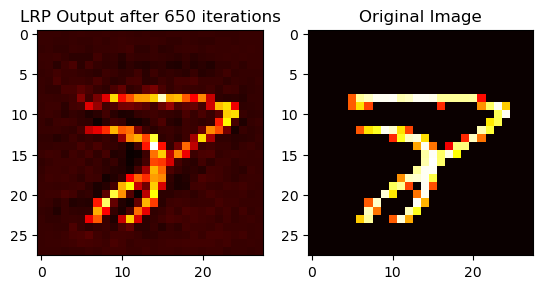

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([9, 5, 7, 0, 9, 1, 8, 9, 5, 2, 4, 5, 9, 5, 9, 0, 6, 4, 9, 7, 6, 0, 1, 4,
        4, 8, 1, 9, 1, 2, 5, 2, 7, 4, 8, 1, 4, 9, 3, 3, 0, 4, 4, 4, 5, 6, 4, 6,
        5, 3, 5, 7, 3, 6, 8, 5, 2, 6, 7, 9, 4, 6, 0, 9])

Test set: Average loss: 0.0002, Accuracy: 10/64 (16%)

Train Epoch: [42240/60000 (70%)]	Loss: 0.663017
Train Epoch: [42880/60000 (71%)]	Loss: 0.632674
Train Epoch: [43520/60000 (72%)]	Loss: 0.441902
Train Epoch: [44160/60000 (74%)]	Loss: 0.558355
Train Epoch: [44800/60000 (75%)]	Loss: 0.390276


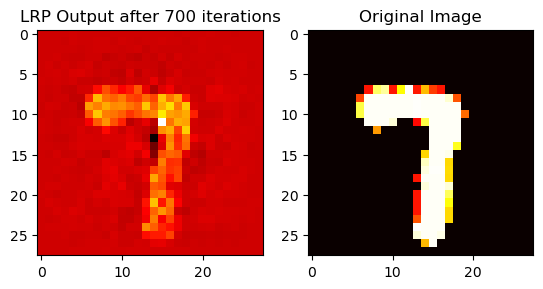

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([1, 5, 6, 9, 7, 5, 2, 2, 0, 8, 0, 7, 8, 4, 4, 1, 2, 8, 4, 0, 1, 0, 5, 6,
        6, 7, 7, 2, 7, 4, 9, 9, 5, 0, 3, 0, 6, 3, 0, 0, 8, 4, 0, 9, 1, 9, 8, 9,
        0, 7, 7, 6, 0, 8, 0, 1, 4, 1, 3, 5, 2, 4, 5, 4])

Test set: Average loss: 0.0002, Accuracy: 7/64 (11%)

Train Epoch: [45440/60000 (76%)]	Loss: 0.591248
Train Epoch: [46080/60000 (77%)]	Loss: 0.475104
Train Epoch: [46720/60000 (78%)]	Loss: 0.623601
Train Epoch: [47360/60000 (79%)]	Loss: 0.604953
Train Epoch: [48000/60000 (80%)]	Loss: 0.561177


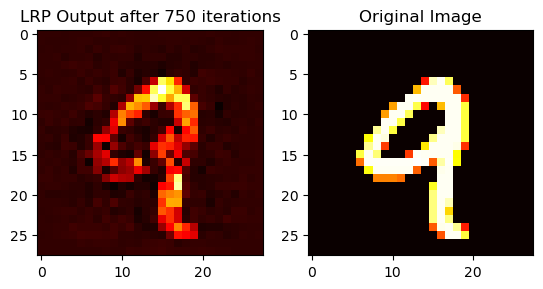

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([8, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 6, 9, 9, 8, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([7, 6, 0, 7, 0, 1, 3, 4, 5, 7, 8, 3, 2, 2, 5, 7, 4, 5, 5, 7, 5, 9, 9, 9,
        0, 1, 5, 5, 0, 2, 0, 3, 9, 4, 2, 6, 2, 4, 7, 9, 5, 8, 9, 4, 7, 7, 0, 1,
        8, 5, 0, 7, 8, 1, 6, 4, 0, 7, 4, 8, 2, 3, 2, 8])

Test set: Average loss: 0.0002, Accuracy: 6/64 (9%)

Train Epoch: [48640/60000 (81%)]	Loss: 0.662235
Train Epoch: [49280/60000 (82%)]	Loss: 0.364711
Train Epoch: [49920/60000 (83%)]	Loss: 0.499423
Train Epoch: [50560/60000 (84%)]	Loss: 0.604403
Train Epoch: [51200/60000 (85%)]	Loss: 0.398929


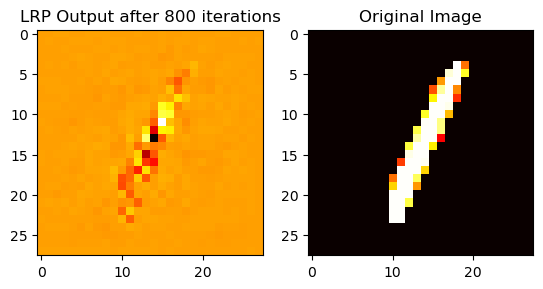

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 9, 9, 9, 9, 8, 9, 9, 0, 8, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 9,
        9, 9, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 8, 9]) tensor([0, 8, 4, 4, 8, 1, 3, 9, 9, 4, 0, 7, 9, 7, 2, 7, 6, 0, 6, 7, 6, 6, 5, 2,
        9, 8, 6, 3, 9, 4, 9, 2, 4, 2, 0, 1, 7, 3, 1, 1, 8, 2, 3, 1, 2, 8, 7, 4,
        9, 7, 6, 1, 4, 7, 0, 1, 8, 9, 7, 1, 0, 1, 7, 7])

Test set: Average loss: 0.0002, Accuracy: 9/64 (14%)

Train Epoch: [51840/60000 (86%)]	Loss: 0.346093
Train Epoch: [52480/60000 (87%)]	Loss: 0.567674
Train Epoch: [53120/60000 (88%)]	Loss: 0.555061
Train Epoch: [53760/60000 (90%)]	Loss: 0.512290
Train Epoch: [54400/60000 (91%)]	Loss: 0.517012


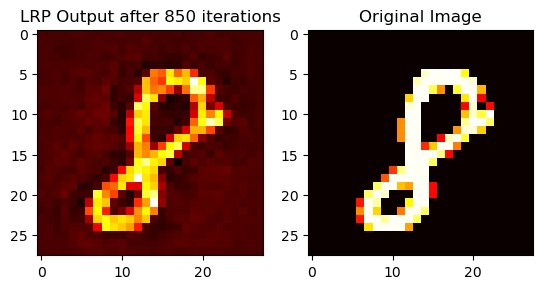

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9]) tensor([4, 6, 9, 5, 2, 4, 4, 5, 3, 8, 1, 3, 4, 0, 9, 1, 3, 8, 3, 7, 0, 5, 8, 4,
        0, 4, 8, 7, 5, 7, 8, 0, 9, 0, 2, 1, 7, 5, 3, 8, 2, 3, 7, 7, 2, 3, 0, 4,
        2, 5, 3, 1, 3, 2, 3, 9, 7, 2, 7, 5, 8, 9, 2, 6])

Test set: Average loss: 0.0002, Accuracy: 5/64 (8%)

Train Epoch: [55040/60000 (92%)]	Loss: 0.557367
Train Epoch: [55680/60000 (93%)]	Loss: 0.476230
Train Epoch: [56320/60000 (94%)]	Loss: 0.468506
Train Epoch: [56960/60000 (95%)]	Loss: 0.441298
Train Epoch: [57600/60000 (96%)]	Loss: 0.495420


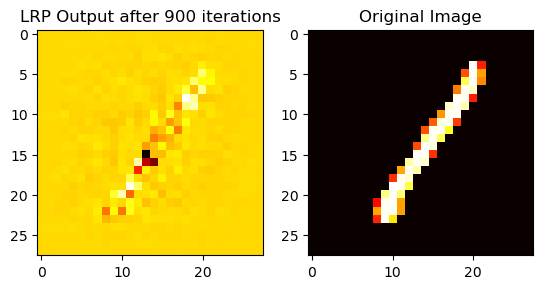

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([7, 1, 1, 6, 9, 7, 3, 1, 1, 3, 9, 1, 2, 3, 9, 6, 1, 5, 1, 2, 7, 6, 3, 2,
        3, 1, 2, 4, 0, 7, 3, 0, 2, 8, 4, 8, 0, 7, 2, 4, 7, 6, 6, 7, 0, 6, 1, 1,
        5, 8, 2, 9, 9, 9, 9, 2, 8, 1, 9, 3, 6, 4, 5, 4])

Test set: Average loss: 0.0002, Accuracy: 8/64 (12%)

Train Epoch: [58240/60000 (97%)]	Loss: 0.440162
Train Epoch: [58880/60000 (98%)]	Loss: 0.394029
Train Epoch: [59520/60000 (99%)]	Loss: 0.309419
Train Epoch: [60160/60000 (100%)]	Loss: 0.517212
Train Epoch: [60800/60000 (101%)]	Loss: 0.502640


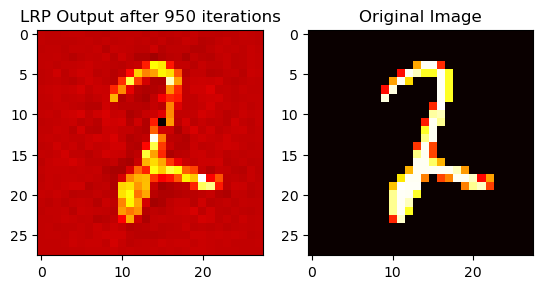

torch.Size([64, 10]) torch.Size([64])
torch.Size([64]) torch.Size([64])
tensor([9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 8, 9, 9, 9,
        9, 9, 9, 9, 8, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9,
        8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]) tensor([8, 3, 7, 4, 2, 7, 9, 4, 3, 3, 3, 8, 1, 6, 3, 1, 4, 6, 9, 5, 2, 9, 3, 8,
        8, 4, 9, 1, 7, 9, 4, 1, 1, 1, 1, 9, 0, 7, 0, 2, 8, 2, 0, 6, 5, 6, 7, 3,
        3, 0, 1, 8, 1, 6, 9, 1, 1, 3, 3, 3, 5, 0, 6, 0])

Test set: Average loss: 0.0003, Accuracy: 7/64 (11%)

Train Epoch: [61440/60000 (102%)]	Loss: 0.402571
Train Epoch: [62080/60000 (103%)]	Loss: 0.397760
Train Epoch: [62720/60000 (104%)]	Loss: 0.463562
Train Epoch: [63360/60000 (106%)]	Loss: 0.389642


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from experiments import SimpleRNet, apply_threshold, CosineDistanceLoss, ManualCNN
from matplotlib import pyplot as plt
import numpy as np
# comment out when running locally
from experiments import WrapperNet
# comment out when running locally

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Initialize the network and optimizer for the underlying network
model = WrapperNet(SimpleRNet())
optimizer = optim.Adam(model.parameters(), lr=1e-4)
# now wrap the network in the LRP class
criterion = CosineDistanceLoss()

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


# over_train_data, over_train_target = data[:1,:,:,:], target[:1]  # Get a single image and target
# # expand so we repeat the same input to a batch size of 64
# over_train_data, over_train_target = over_train_data.expand(64, 1, 28, 28), over_train_target.expand(64)

model.train()
for x in range(1000):
    model.train()
    data, target = next(iter(train_loader))
    data, target = data.to(device), target.to(device)
    target_map = apply_threshold(data, threshold=0.99)
    optimizer.zero_grad()
    # print(target.unsqueeze(1))
    output = model(data, target)
    # print(output.shape, target_map.shape) 
    loss = criterion(output, target_map)
    loss.backward()
    optimizer.step()
    
    if x % 10 == 0:
        print(f'Train Epoch: [{x * len(data)}/{len(train_loader.dataset)} ({100. * x / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    if x % 50 == 0:
        # Plotting
        num = np.random.randint(0, 64)
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(output[num][0].detach().numpy(), cmap='hot')
        axes[0].set_title(f'LRP Output after {x} iterations')
        axes[1].imshow(target_map[num][0], cmap='hot')
        axes[1].set_title('Original Image')
        plt.show()
        run_test_on_inner_net(model.model, test_loader)
